In [3]:
from chatterjee import chatt
from chatterjee import chatt_table
from chatterjee import chatt_pval
import pandas as pd
import math
import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns

/home/bednarz_jan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


COSINE:


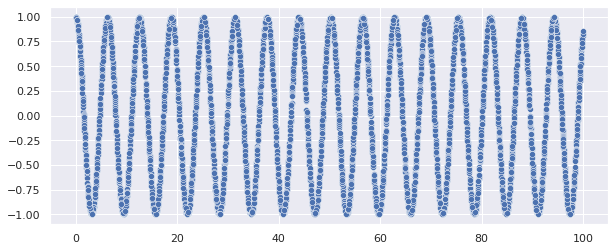

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.015799,-0.017137,-0.011104,0.990517,0.006805


TANGENT:


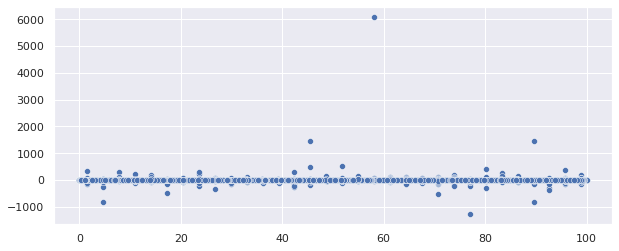

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.001939,-0.003565,0.008115,0.98092,-0.000036


LOGATRITHM:


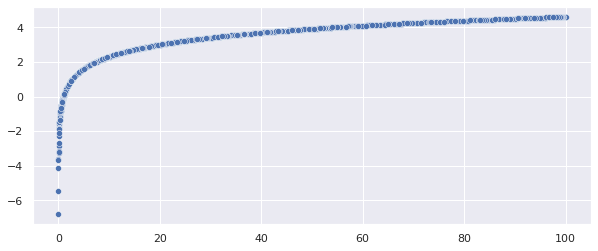

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,0.860778,0.999983,0.997488,0.999579,0.994441


REVERSED SQUARE:


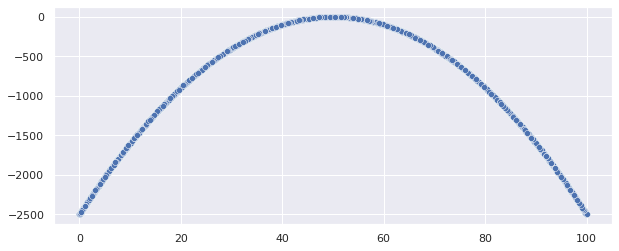

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.002719,-0.004021,-0.003991,0.99916,0.244205


RANDOM:


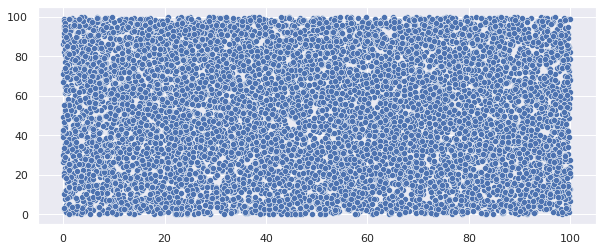

,PEARSON,SPEARMAN,KENDALL,CHATTERJEE1,CHATTERJEE2
0,-0.011595,-0.011595,-0.007766,-0.00466,0.003323


In [26]:
rnd.seed = 2007
sns.set(rc={'figure.figsize':(10, 4)})

X = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

Y_cos  = [round(math.cos(a), 2) for a in X]
Y_tan  = [round(math.tan(a), 2) for a in X]
Y_log  = [round(math.log(a), 2) for a in X]

Y_sqr  = [round(math.pow(a-50, 2)*-1, 2) for a in X]

Y_rnd = [round(rnd.uniform(0, 100), 4) for _ in range(10000)]

list_of_Ys = [Y_cos, Y_tan, Y_log, Y_sqr, Y_rnd]
list_print = ['COSINE:', 'TANGENT:', 'LOGATRITHM:', 'REVERSED SQUARE:', 'RANDOM:']

def add_noise(Y, noise_value):
    return [a + rnd.uniform(-noise_value, noise_value) for a in Y]

for idx, Y in enumerate(list_of_Ys):

    # Y = add_noise(Y, 0.5)
    
    print(list_print[idx])

    sns.scatterplot(x=X, y=Y)
    plt.show()

    dict_pd = {'X': X, 'Y': Y}
    df = pd.DataFrame(dict_pd)

    df_corr_dict = {}

    df_corr_dict['PEARSON'] = [df['X'].corr(df['Y'])]
    df_corr_dict['SPEARMAN'] = [df['X'].corr(df['Y'], method = 'spearman')]
    df_corr_dict['KENDALL'] = [df['X'].corr(df['Y'], method = 'kendall')]

    df_corr_dict['CHATTERJEE1'] = chatt(df['X'], df['Y'])
    df_corr_dict['CHATTERJEE2'] = chatt(df['Y'], df['X'])

    df_corr = pd.DataFrame(df_corr_dict)

    display(df_corr)

Tabela korelacji Spearmana


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,-0.018898,-0.007861,0.999983,0.012062,-0.004619
Y_cos,-0.018898,1.000000,-0.000989,-0.018943,0.008643,0.016597
Y_tan,-0.007861,-0.000989,1.000000,-0.007955,-0.002332,-0.001377
Y_log,0.999983,-0.018943,-0.007955,1.000000,0.012112,-0.004703
Y_sqr,0.012062,0.008643,-0.002332,0.012112,1.000000,-0.014864
Y_rnd,-0.004619,0.016597,-0.001377,-0.004703,-0.014864,1.000000


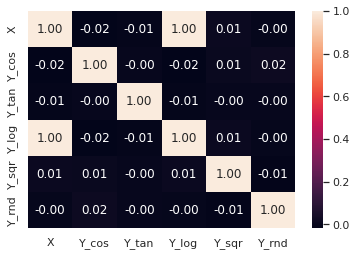


 Tabela korelacji Chatterjee


,X,Y_cos,Y_tan,Y_log,Y_sqr,Y_rnd
X,1.000000,0.014503,-0.002051,0.994696,0.256978,0.000239
Y_cos,0.990696,1.000000,0.262722,0.846390,0.767853,-0.000335
Y_tan,0.980933,0.252281,1.000000,0.719449,0.473217,-0.000107
Y_log,0.999699,0.014550,-0.002021,1.000000,0.257033,0.000225
Y_sqr,0.999398,0.014163,0.008633,0.989517,1.000000,-0.001315
Y_rnd,0.006272,0.000866,0.003955,-0.001341,-0.001934,1.000000


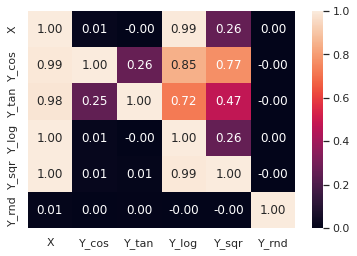

In [6]:
print('Tabela korelacji Spearmana')

display(df_vars.corr(method='spearman'))

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_vars.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()

print('\n Tabela korelacji Chatterjee')

df_corr_chatt = chatt_table(df_vars)
display(df_corr_chatt)

sns.set(rc={'figure.figsize':(6, 4)})
sns.heatmap(df_corr_chatt, annot=True, fmt=".2f")
plt.show()


In [19]:
def add_noise(Y, noise_ratio):
    return [a * rnd.uniform(-noise_ratio, noise_ratio) for a in Y]

Y_noisy = add_noise(Y_cos,0.1)